Instituto Federal de Educação, Ciência e Tecnologia do Maranhão

Aluno: Felipe Silva Kzam De Sá  
Código: 20181SI0014  
Disciplina: Tópicos Especiais em Sistema de Informação II

Data:30/06/2022  



**Projeto Final**

##Importanto Bibliotecas utilizadas
------------------------------------------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn.palettes import color_palette

##Primeiros Passos
---------------------------------------

Carregando os Dados

In [2]:
dados = pd.read_csv("day.csv")

dados.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


###Informações:

link: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset?select=day.csv

Fonte: Laboratório de Inteligência Artificial e Apoio à Decisão (LIAAD), Universidade do Porto

Este conjunto de dados contém a contagem diária de bicicletas alugadas entre os anos de 2011 e 2012 no sistema de compartilhamento de bicicletas da Capital com as informações meteorológicas e sazonais correspondentes.


###Tradução dos dados
-----------------------------

Vamos traduzir o Dataframe para podermos deixar as informações mais fáceis de interpretar.

**Traduzindo as colunas:**

In [3]:
dados.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
renomear = {
    'dteday': 'Data',
    'season': 'Estação',
    'yr': 'Ano',
    'mnth': 'Mês',
    'holiday': 'Feriado',
    'weekday': 'Dia_Semana',
    'workingday': 'Trabalho',
    'weathersit': 'Clima',
    'temp': 'Temperatura',
    'atemp': 'Sensação_Térmica',
    'hum': 'Umidade',
    'windspeed': 'Velocidade_Vento',
    'casual': 'Casuais',
    'registered': 'Registrados',
    'cnt': 'Total'
}

dados = dados.rename(columns = renomear)

In [5]:
dados.head(1)

,instant,Data,Estação,Ano,Mês,Feriado,Dia_Semana,Trabalho,Clima,Temperatura,Sensação_Térmica,Umidade,Velocidade_Vento,Casuais,Registrados,Total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


**Traduzindo as linhas:**

In [6]:
dados['Estação'].unique()

array([1, 2, 3, 4])

In [7]:
dados['Ano'].unique()

array([0, 1])

In [8]:
dados['Mês'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [9]:
dados['Feriado'].unique()

array([0, 1])

In [10]:
dados['Dia_Semana'].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [11]:
dados['Trabalho'].unique()

array([0, 1])

In [12]:
dados['Clima'].unique()

array([2, 1, 3])

In [13]:
estação = {
  1: "Inverno",
  2: "Primavera",
  3: "Verão",
  4: "Outono"
}

ano = {
    0: '2011',
    1: '2012'
}

mes = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

feriado = {
    0: 'Não',
    1: 'Sim'
}

semana = {
    0: 'Domingo',
    1: 'Segunda',
    2: 'Terça',
    3: 'Quarta',
    4: 'Quinta',
    5: 'Sexta',
    6: 'Sábado'
}

trab = {
    0: 'Não',
    1: 'Sim'
}

clima = {
    2: 'Névoa/Nublado',
    1: 'Limpo',
    3: 'Neve/Chuva'
}

dados["Estação"] = dados["Estação"].map(estação)
dados["Ano"] = dados["Ano"].map(ano)
dados["Mês"] = dados["Mês"].map(mes)
dados["Feriado"] = dados["Feriado"].map(feriado)
dados["Dia_Semana"] = dados["Dia_Semana"].map(semana)
dados["Trabalho"] = dados["Trabalho"].map(trab)
dados["Clima"] = dados["Clima"].map(clima)

In [14]:
dados.head()

,instant,Data,Estação,Ano,Mês,Feriado,Dia_Semana,Trabalho,Clima,Temperatura,Sensação_Térmica,Umidade,Velocidade_Vento,Casuais,Registrados,Total
0,1,2011-01-01,Inverno,2011,Janeiro,Não,Sábado,Não,Névoa/Nublado,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Inverno,2011,Janeiro,Não,Domingo,Não,Névoa/Nublado,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Inverno,2011,Janeiro,Não,Segunda,Sim,Limpo,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Inverno,2011,Janeiro,Não,Terça,Sim,Limpo,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Inverno,2011,Janeiro,Não,Quarta,Sim,Limpo,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Todo o Dataframe está traduzido, as variáveis do tipo categóricas que eram do tipo int foram transformadas em String, para facilitar melhor a compreensão.

###Transformações e Informações gerais

Vamos apagar uma coluna do Dataframe, a coluna "instant", que nada mais é do que uma coluna que apresenta o índice de cada linha. Não iremos precisar ao longo das análises.

In [15]:
del dados["instant"]

dados.head(1)

,Data,Estação,Ano,Mês,Feriado,Dia_Semana,Trabalho,Clima,Temperatura,Sensação_Térmica,Umidade,Velocidade_Vento,Casuais,Registrados,Total
0,2011-01-01,Inverno,2011,Janeiro,Não,Sábado,Não,Névoa/Nublado,0.344167,0.363625,0.805833,0.160446,331,654,985


Vamos arredondar os valores das colunas "Temperatura", "Sensação_Térmica", "Umidade", e "Velocidade_Vento" em duas casas decimais.

In [16]:
dados["Temperatura"] = dados["Temperatura"].round(2)
dados["Sensação_Térmica"] = dados["Sensação_Térmica"].round(2)
dados["Umidade"] = dados["Umidade"].round(2)
dados["Velocidade_Vento"] = dados["Velocidade_Vento"].round(2)

In [17]:
dados.head()

,Data,Estação,Ano,Mês,Feriado,Dia_Semana,Trabalho,Clima,Temperatura,Sensação_Térmica,Umidade,Velocidade_Vento,Casuais,Registrados,Total
0,2011-01-01,Inverno,2011,Janeiro,Não,Sábado,Não,Névoa/Nublado,0.34,0.36,0.81,0.16,331,654,985
1,2011-01-02,Inverno,2011,Janeiro,Não,Domingo,Não,Névoa/Nublado,0.36,0.35,0.70,0.25,131,670,801
2,2011-01-03,Inverno,2011,Janeiro,Não,Segunda,Sim,Limpo,0.20,0.19,0.44,0.25,120,1229,1349
3,2011-01-04,Inverno,2011,Janeiro,Não,Terça,Sim,Limpo,0.20,0.21,0.59,0.16,108,1454,1562
4,2011-01-05,Inverno,2011,Janeiro,Não,Quarta,Sim,Limpo,0.23,0.23,0.44,0.19,82,1518,1600


**Informações Gerais**

In [18]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data              731 non-null    object 
 1   Estação           731 non-null    object 
 2   Ano               731 non-null    object 
 3   Mês               731 non-null    object 
 4   Feriado           731 non-null    object 
 5   Dia_Semana        731 non-null    object 
 6   Trabalho          731 non-null    object 
 7   Clima             731 non-null    object 
 8   Temperatura       731 non-null    float64
 9   Sensação_Térmica  731 non-null    float64
 10  Umidade           731 non-null    float64
 11  Velocidade_Vento  731 non-null    float64
 12  Casuais           731 non-null    int64  
 13  Registrados       731 non-null    int64  
 14  Total             731 non-null    int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 85.8+ KB


In [19]:
dados.nunique()

Data                731
Estação               4
Ano                   2
Mês                  12
Feriado               2
Dia_Semana            7
Trabalho              2
Clima                 3
Temperatura          77
Sensação_Térmica     71
Umidade              72
Velocidade_Vento     42
Casuais             606
Registrados         679
Total               696
dtype: int64

In [20]:
dados.describe()

,Temperatura,Sensação_Térmica,Umidade,Velocidade_Vento,Casuais,Registrados,Total
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495417,0.474323,0.627921,0.190383,848.176471,3656.172367,4504.348837
std,0.183208,0.162928,0.142636,0.077679,686.622488,1560.256377,1937.211452
min,0.060000,0.080000,0.000000,0.020000,2.000000,20.000000,22.000000
25%,0.340000,0.340000,0.520000,0.130000,315.500000,2497.000000,3152.000000
50%,0.500000,0.490000,0.630000,0.180000,713.000000,3662.000000,4548.000000
75%,0.660000,0.610000,0.730000,0.230000,1096.000000,4776.500000,5956.000000
max,0.860000,0.840000,0.970000,0.510000,3410.000000,6946.000000,8714.000000


##Análise 01 - Estação/Clima/Temperatura
--------------------------------------

###As Estações afetam o total de pessoas?

Vamos gerar um gráfico de barras

<ipython-input-21-f28bdfd35cc6>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.catplot(x="Estação", y="Total", palette="hsv", kind="bar", ci= None, data=dados)


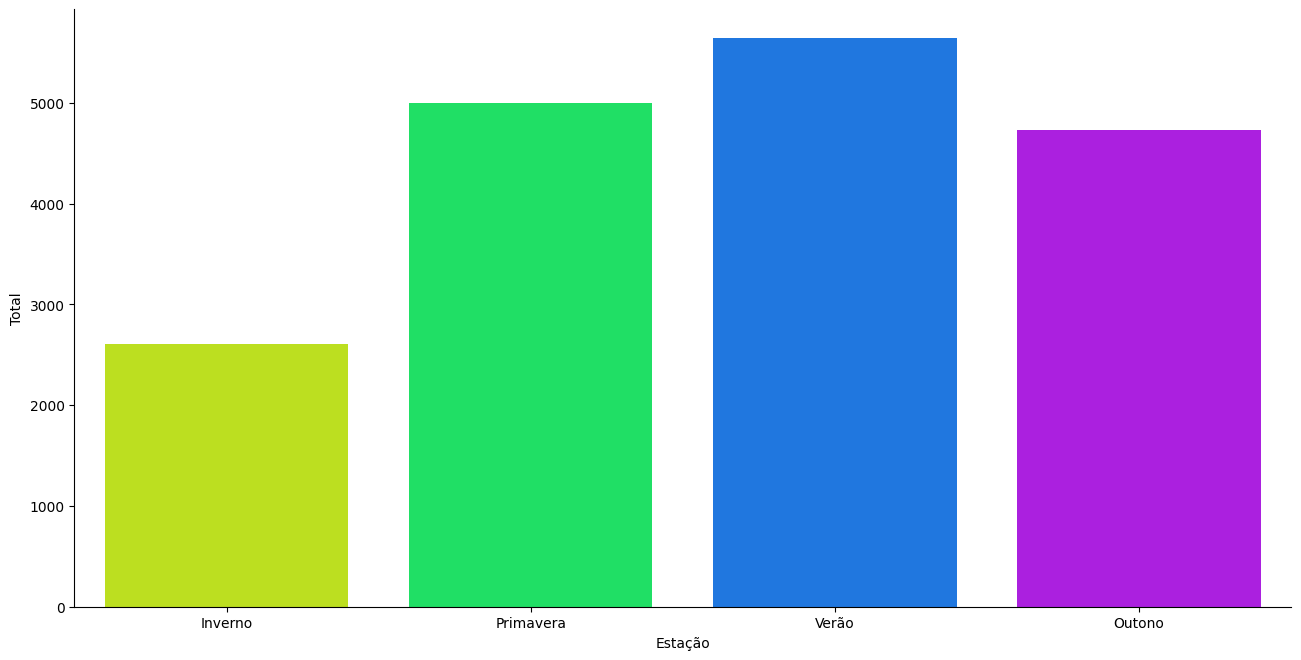

In [21]:
ax = sns.catplot(x="Estação", y="Total", palette="hsv", kind="bar", ci= None, data=dados)
ax.figure.set_size_inches(15, 7)

Analisando o gráfico, podemos ver que as pessoas estão mais alugando bicicletas no verão.

###E quanto ao Clima?

Vamos ver como o clima se comporta ao longo das estações

<ipython-input-22-e780712587bb>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.catplot(x="Estação", y="Total", hue="Clima", palette="hsv", kind="bar", ci= None, data=dados)


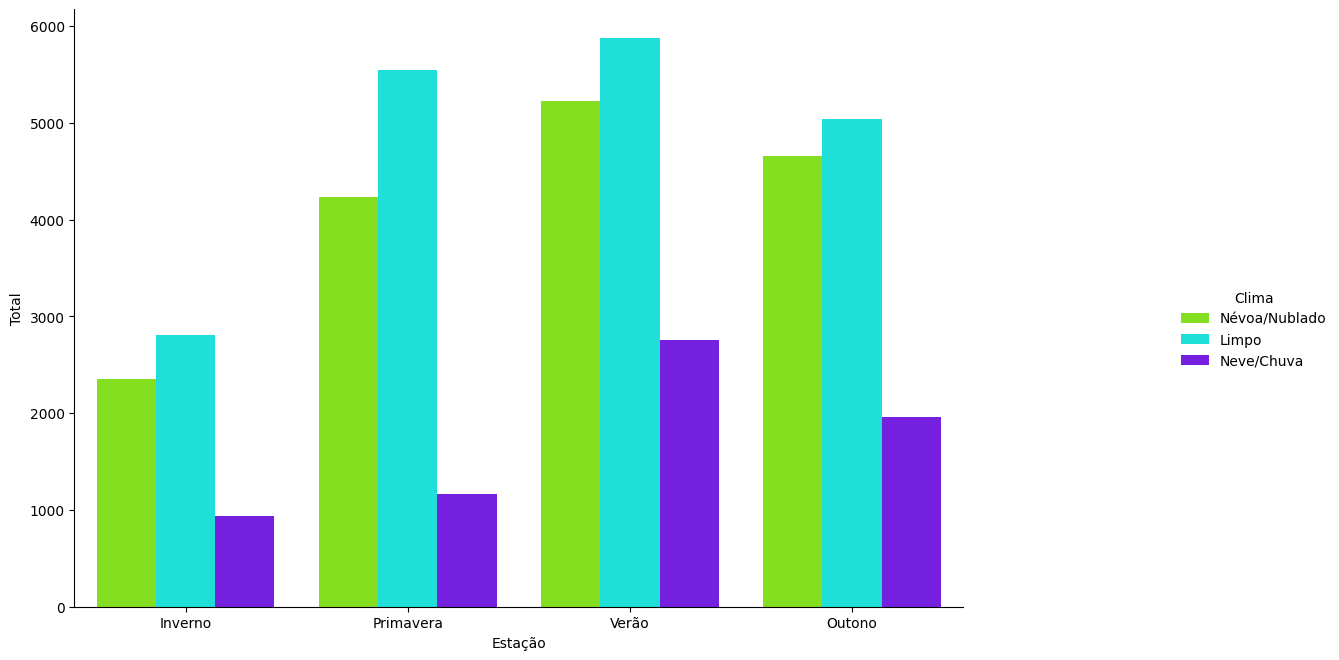

In [22]:
ax = sns.catplot(x="Estação", y="Total", hue="Clima", palette="hsv", kind="bar", ci= None, data=dados)
ax.figure.set_size_inches(15, 7)

Podemos ver que em todas as estações, a preferência é pelo clima Limpo.
Ou seja, a maioria está optando pelo Verão durante o Clima Limpo

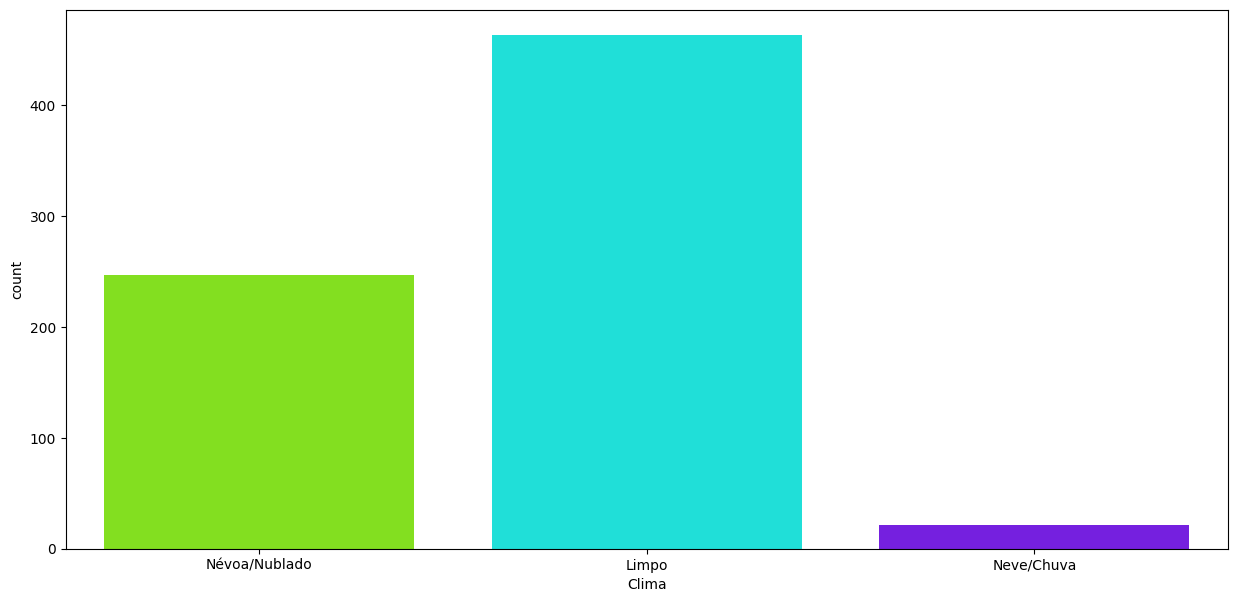

In [23]:
ax = sns.countplot(x="Clima", palette="hsv", data=dados)
ax.figure.set_size_inches(15, 7)

De fato, o Clima Limpo é o mais predominante ao longo dos anos.

###E quanto a Temperatura?

Vamos criar um gráfico de regressão linear para observar o total de pessoas ao longo da temperatura

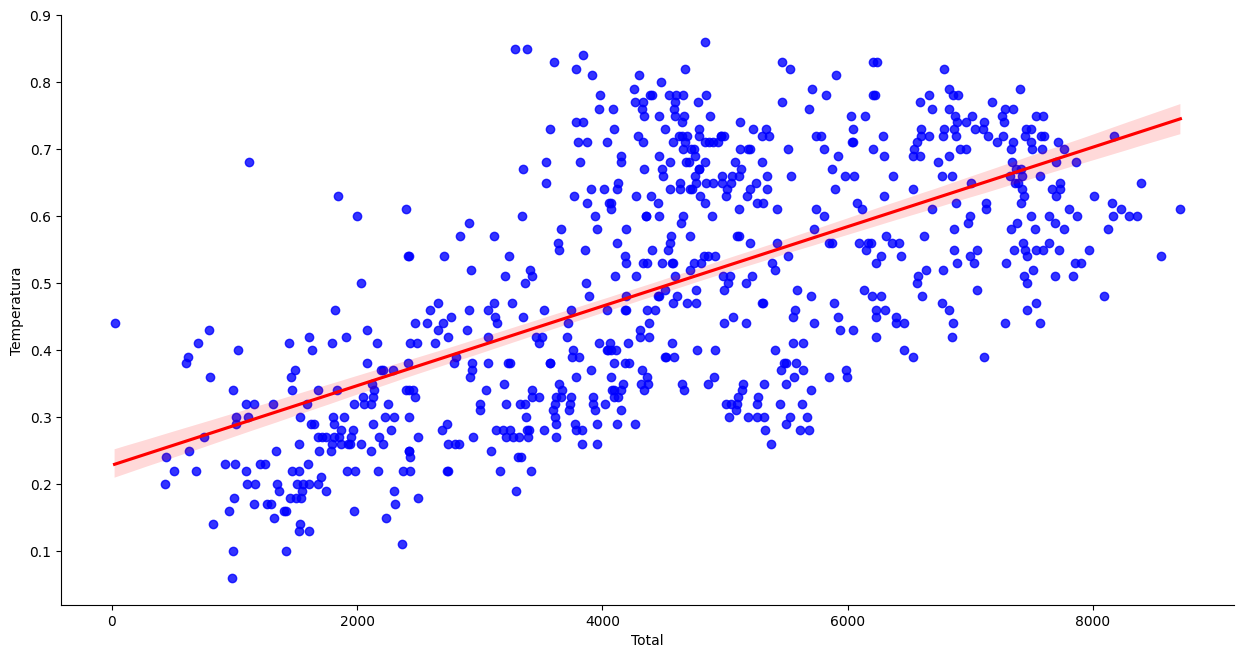

In [24]:
ax = sns.lmplot(x='Total', y='Temperatura', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'}, data=dados)
ax.figure.set_size_inches(14, 7)

Pela análise de uma regressão linear, podemos ver que o total de pessoas alugando bicicletas crescem na medida que a temperatura aumenta.

Aora uma visão mais detalhada por cada clima:

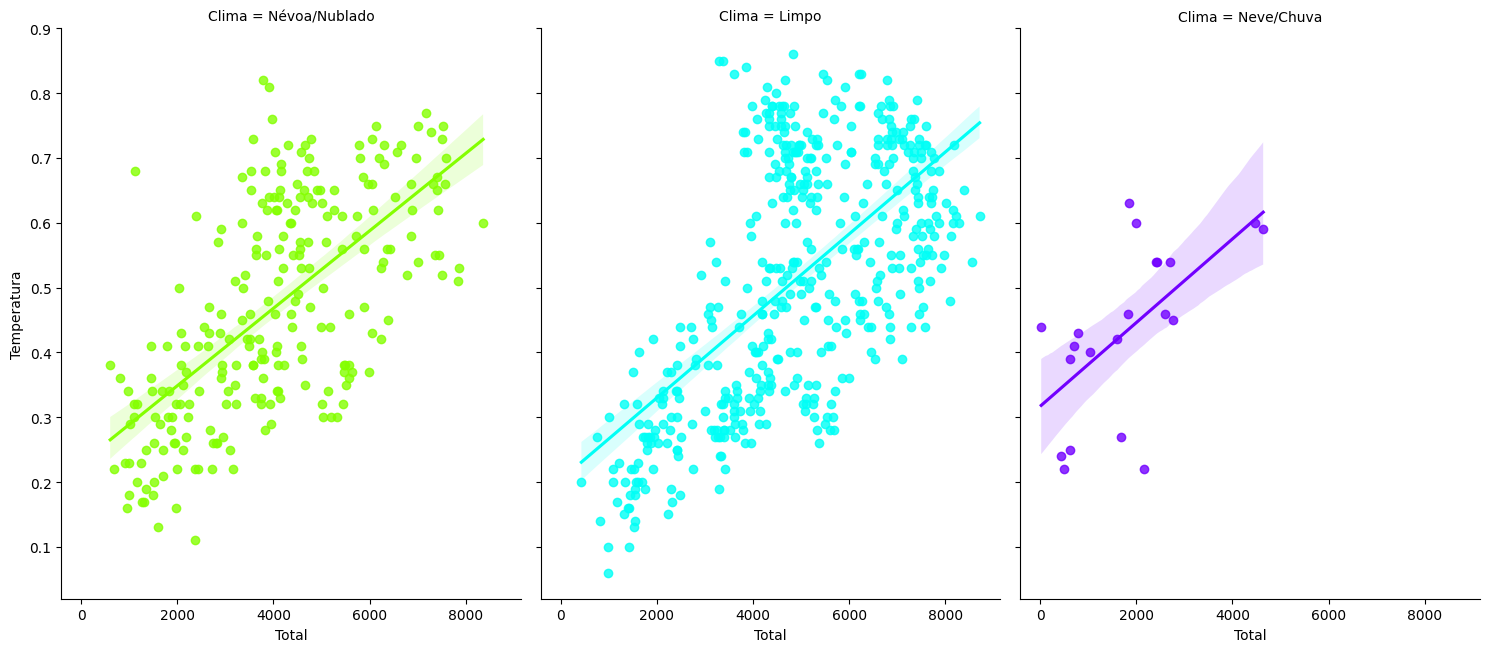

In [25]:
ax = sns.lmplot(x='Total', y='Temperatura', hue="Clima", col="Clima", palette="hsv", data=dados)
ax.figure.set_size_inches(15, 7)

O Clima de Neve/chuva é mais frio e possui menos pessoas, o que está ligado ao inverno.  

Agora o Histograma da temperatura:

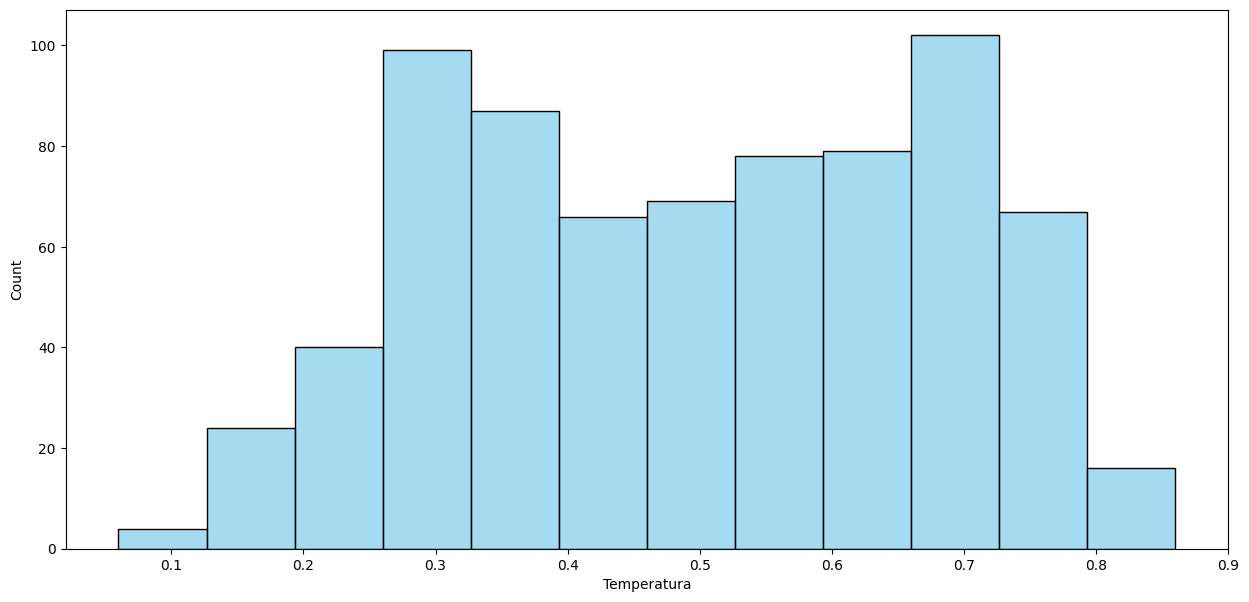

In [26]:
ax = sns.histplot(data=dados, color="skyblue", x="Temperatura")
ax.figure.set_size_inches(15, 7)

O mesmo Histograma só que dividido pelo clima:

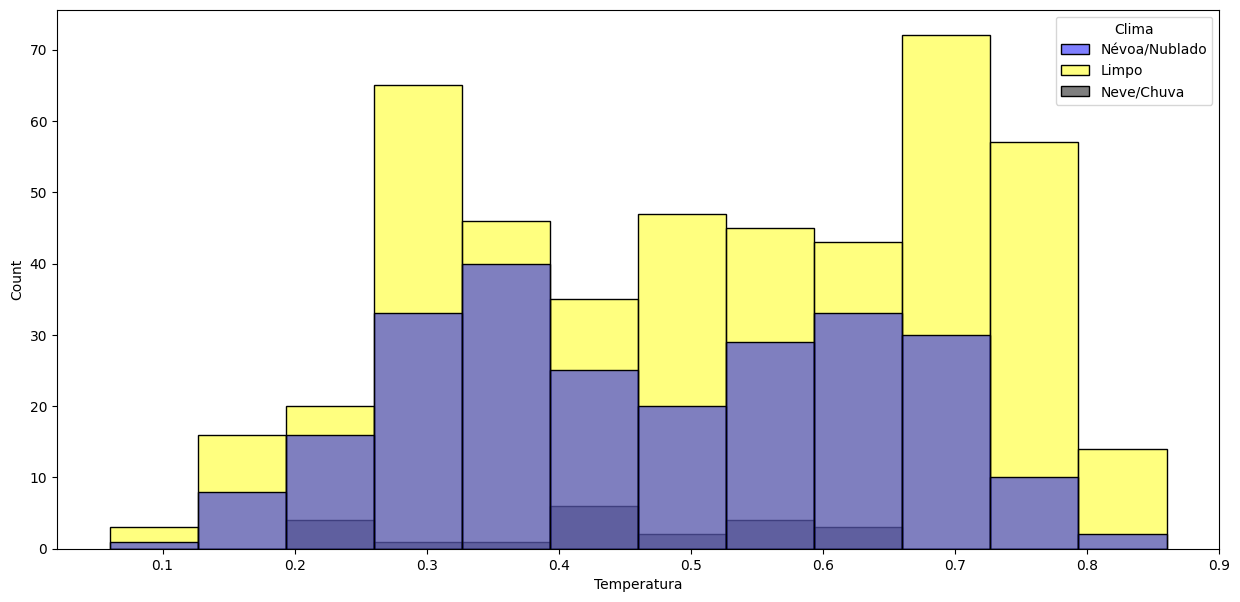

In [27]:
ax = sns.histplot(data=dados, x="Temperatura", hue="Clima", palette=["blue", "yellow", "black"])
ax.figure.set_size_inches(15, 7)

###Sensação Térmica

Podemos visualizar também o gráfico da Sensação Térmica por Estação:

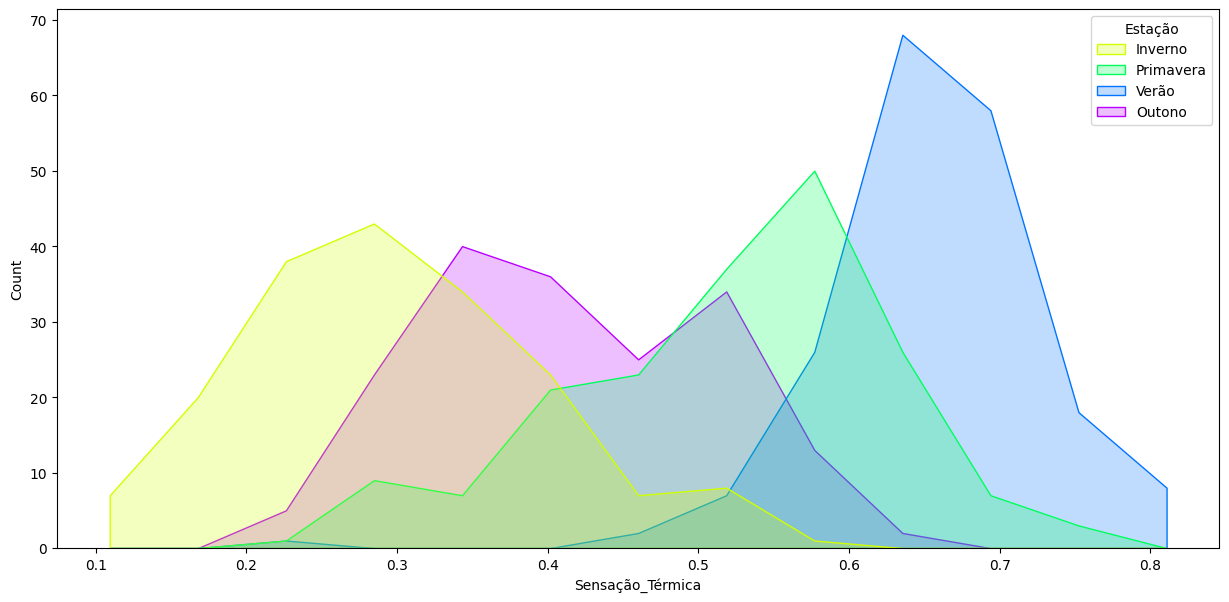

In [28]:
ax = sns.histplot(data=dados, x="Sensação_Térmica", hue="Estação", element="poly", palette="hsv")
ax.figure.set_size_inches(15, 7)

Ela é mais alta durante o verão, assim como a temperatura.

###Resumo

E agora um resumo de todos os dados obervados:

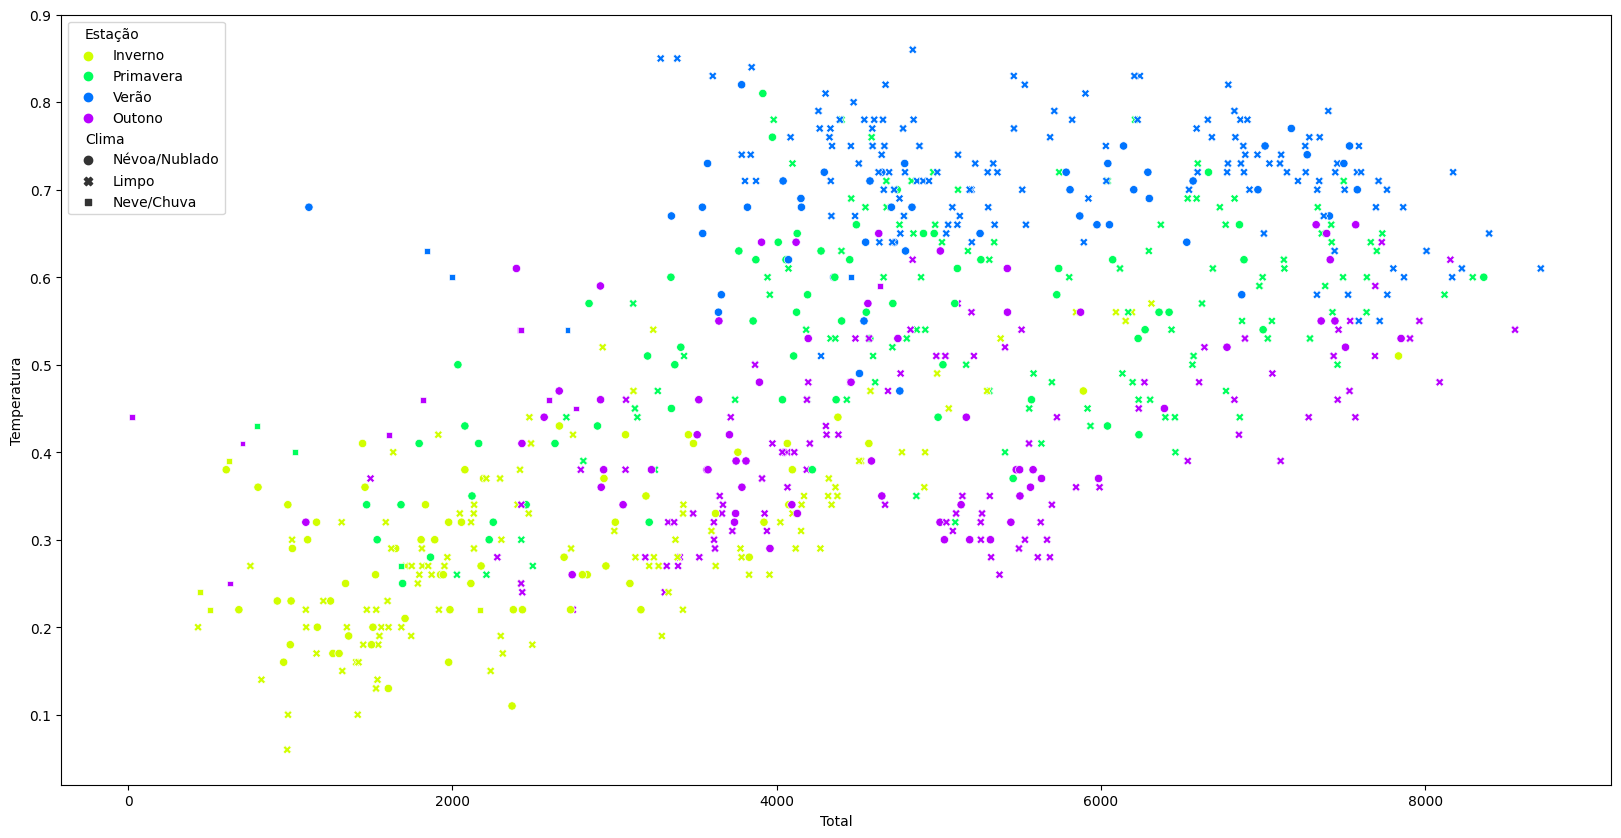

In [29]:
plt.subplots(figsize=(20,10))
ax = sns.scatterplot(data = dados, x = "Total", y = "Temperatura", hue = "Estação", style = "Clima", palette="hsv")

Como podemos ver, as temperaturas mais altas estão relacionadas com o Verão. Vimos no gráficos de barras que o verão é a estação mais popular, e vimos no histograma que o clima Limpo é mais predominante.

Sensação Térmica dividido pelas estações:

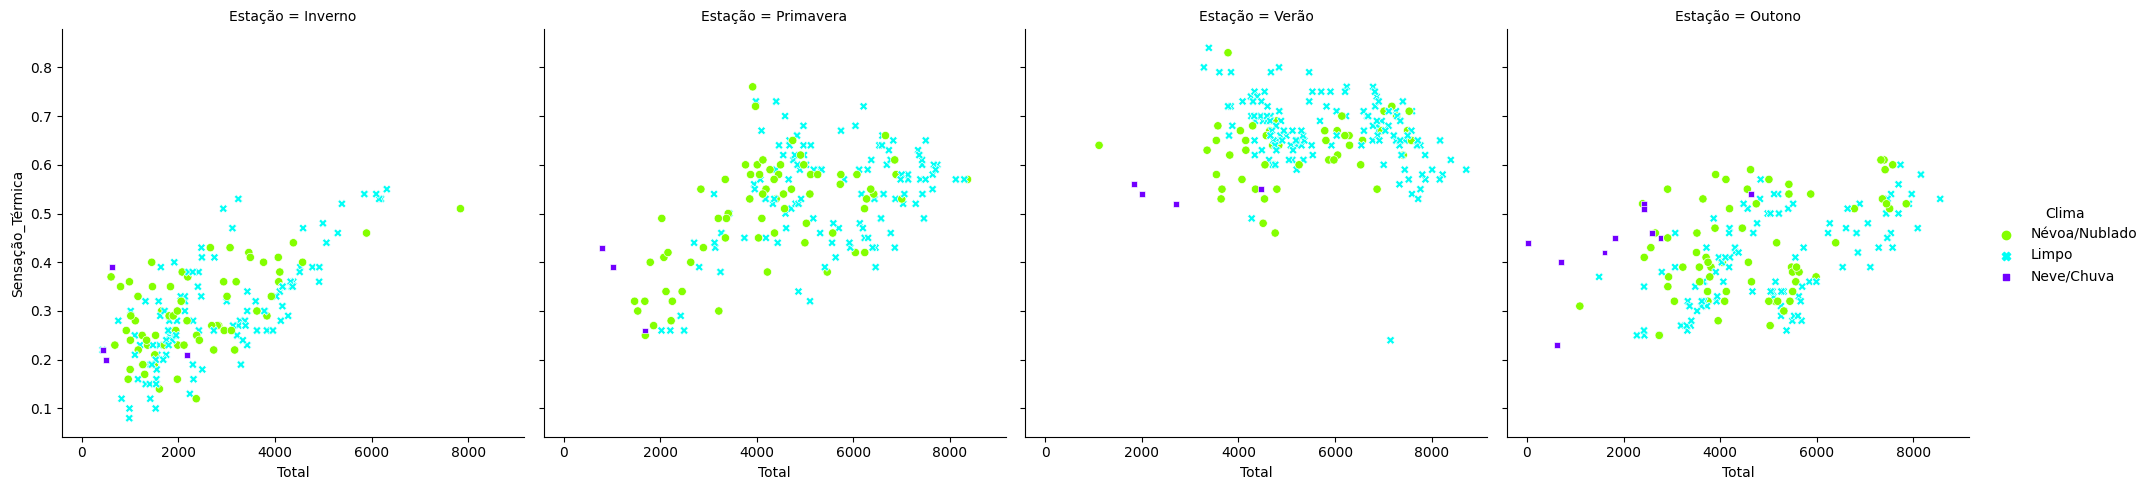

In [30]:
ax = sns.relplot(data=dados, x = "Total", y = "Sensação_Térmica", col="Estação", hue = "Clima", style = "Clima", kind="scatter", palette="hsv")

Podemos ver que realmente o verão é a estação mais popular e o inverno a menos.

##Análise 02 - Ano/Mês/Dia
-------------------------------

###Olhando os dados por Ano

Existem 2 anos: 2011 e 2012:

<ipython-input-31-8c13622217a3>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.catplot(x="Ano", y="Total", palette="hsv", kind="bar", ci= None, data=dados)


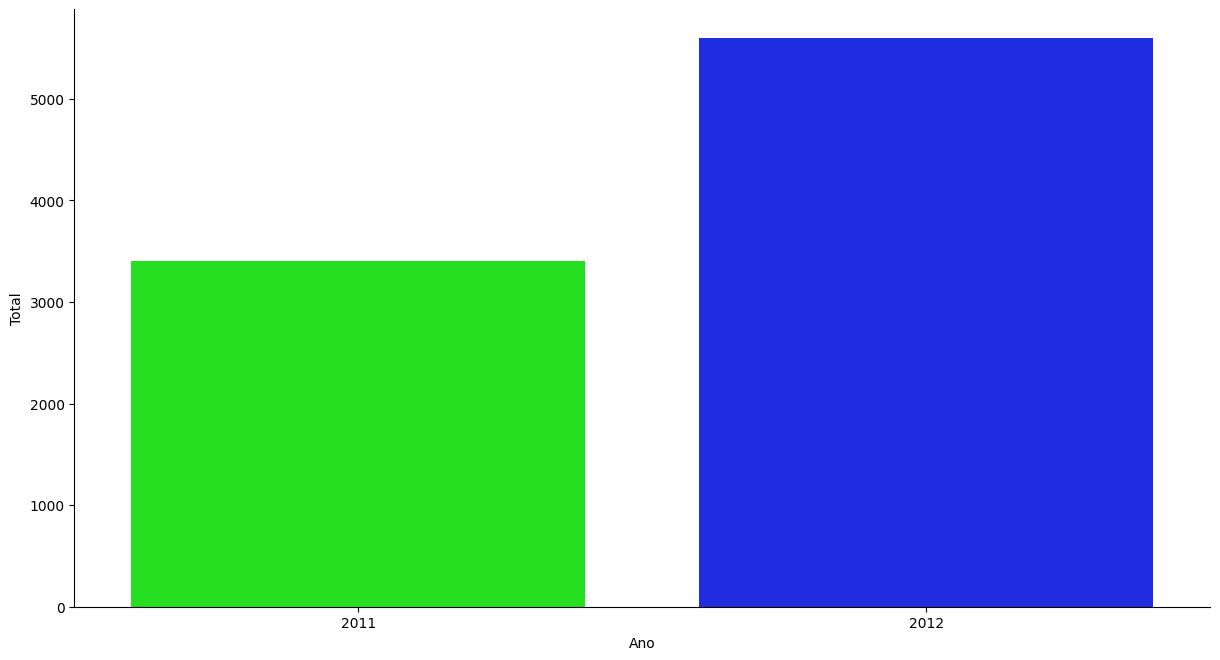

In [31]:
ax = sns.catplot(x="Ano", y="Total", palette="hsv", kind="bar", ci= None, data=dados)
ax.figure.set_size_inches(14, 7)

Podemos ver que 2012 teve uma demanda maior

###Analisando mensalmente

Vamos comparar os meses entre os 2 anos:

<ipython-input-32-9bbea8b7ebfb>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.catplot(x="Mês", y="Total", hue="Ano", palette="hsv", kind="bar", ci= None, data=dados)


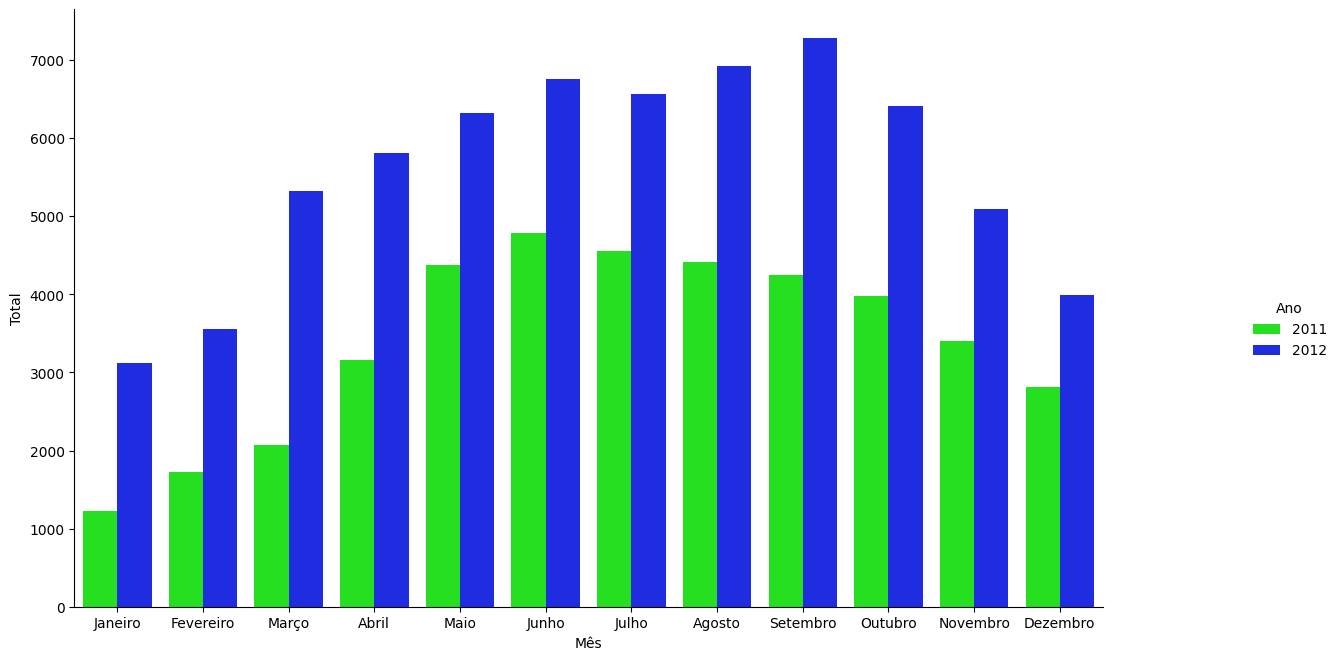

In [32]:
ax = sns.catplot(x="Mês", y="Total", hue="Ano", palette="hsv", kind="bar", ci= None, data=dados)
ax.figure.set_size_inches(15, 7)

Podemos ver que em todos os meses de 2011 e 2012, teve aumento de pessoas.

###Analisando Diariamente

Vamos comparar os dias:

<ipython-input-33-a14036150e09>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.catplot(x="Dia_Semana", y="Total", hue="Ano", palette="hsv", kind="bar", ci= None, data=dados)


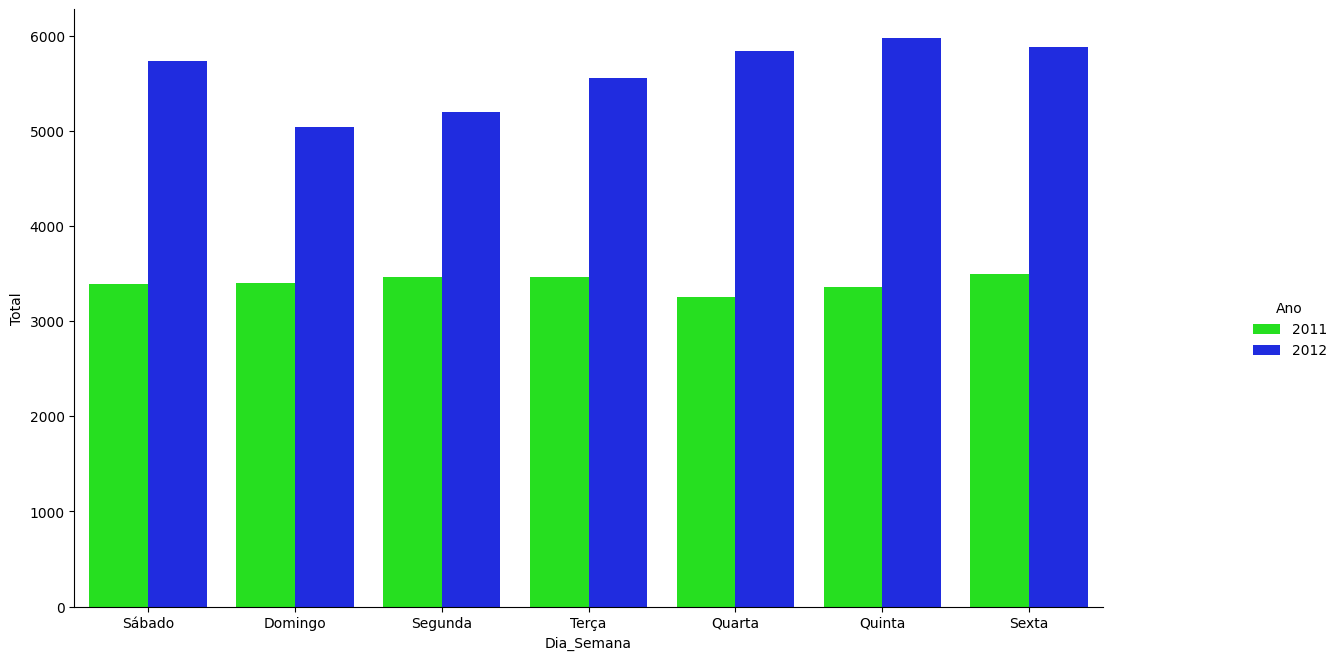

In [33]:
ax = sns.catplot(x="Dia_Semana", y="Total", hue="Ano", palette="hsv", kind="bar", ci= None, data=dados)
ax.figure.set_size_inches(15, 7)

Assim como mensalmente, diariamente o comportamento é igual

###Gráfico de linhas(Mensal)

Vamos gerar um gráfico de linhas que mostre o aumento do número de pessoas mensalmente durante os 2 anos

Criando uma cópia dos dados com somente a data e o total de pessoas.

In [34]:
dados_teste = dados[:]
dados_final=dados_teste[['Data','Total']]

In [35]:
dados_final.head()

,Data,Total
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


Convertendo a coluna "Data" para o formato "datetime64". Assim podemos agrupar em vários períodos

In [36]:
dados_final["Data"] = dados_final["Data"].astype("datetime64")

<ipython-input-36-d4bad8774977>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_final["Data"] = dados_final["Data"].astype("datetime64")


In [37]:
dados_final.dtypes

Data     datetime64[ns]
Total             int64
dtype: object

Agrupando os dados em uma frequência Mensal

In [38]:
dados_final = dados_final.groupby(pd.Grouper(key="Data", freq="M")).sum().reset_index()

In [39]:
dados_final.head()

,Data,Total
0,2011-01-31,38189
1,2011-02-28,48215
2,2011-03-31,64045
3,2011-04-30,94870
4,2011-05-31,135821


Gerando o gráfico:

Text(0, 0.5, 'Total')

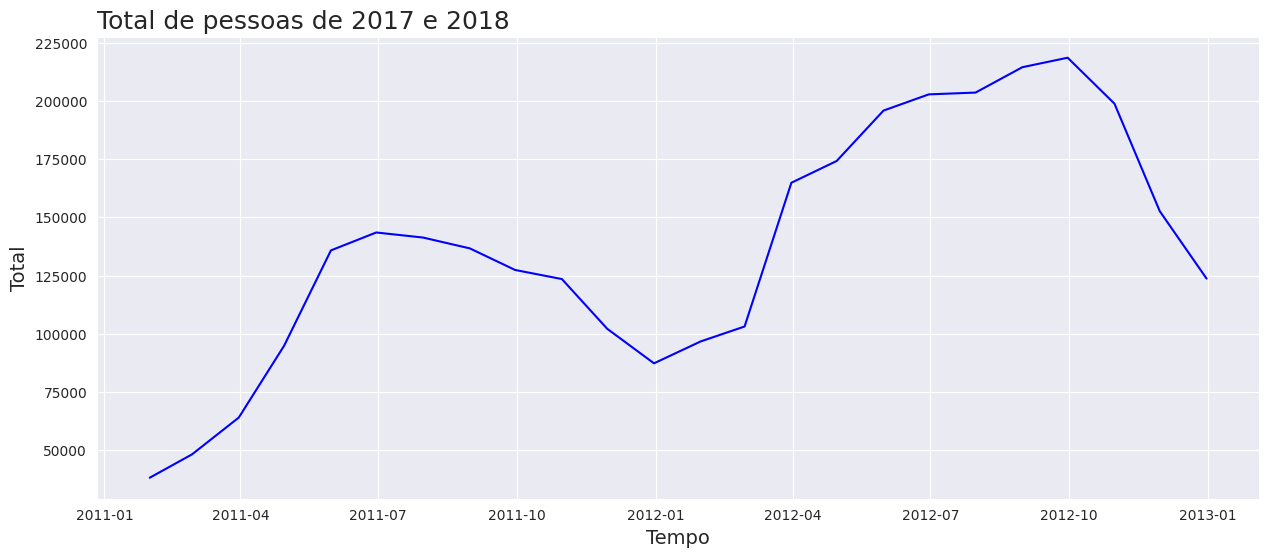

In [40]:
sns.set_style('darkgrid')
ax = sns.lineplot(x='Data', y='Total', color="blue", data=dados_final)
ax.figure.set_size_inches(15,6)
ax.set_title('Total de pessoas de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Total', fontsize=14)

Como podemos ver, o gráfico mostra um grande aumento de 2011 a 2012.

##Análise 03 - Trabalho/Feriado
-----------------------------------

###Trabalho

Vamos analisar o total de pessoas nos dias de Trabalho (se o dia não for fim de semana e nem feriado):

<ipython-input-41-0d09865454e6>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.catplot(x="Trabalho", y="Total", palette="hsv", data=dados)


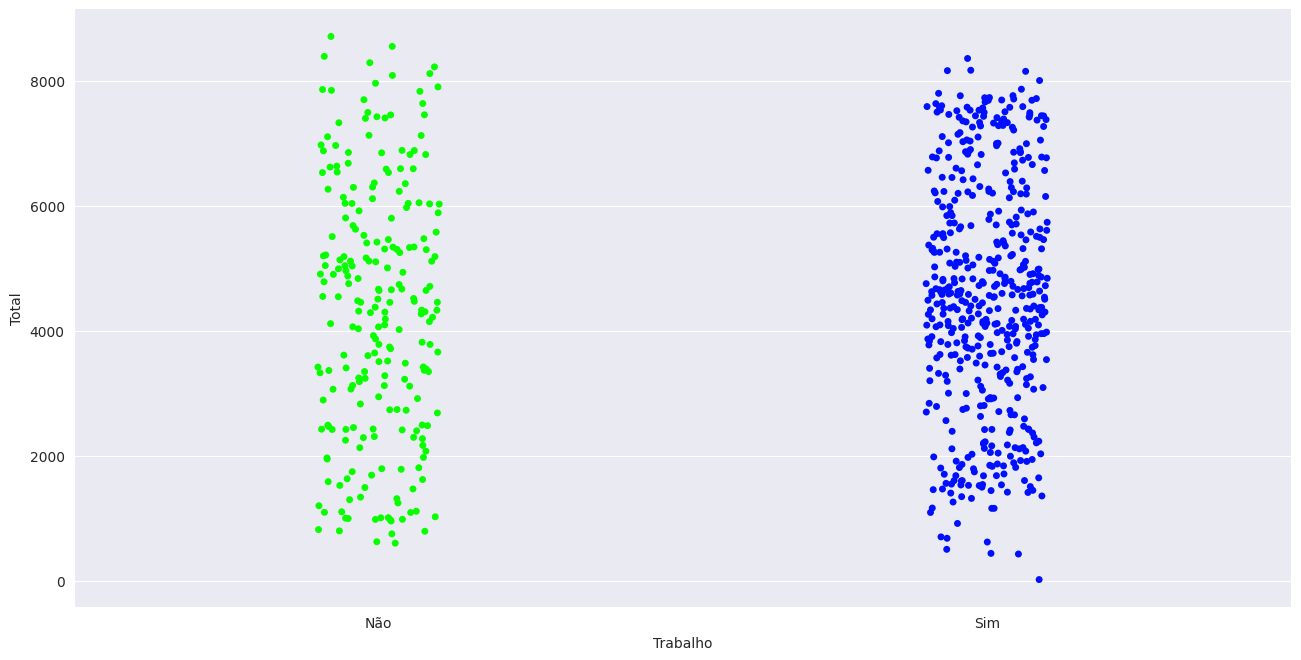

In [41]:
ax = sns.catplot(x="Trabalho", y="Total", palette="hsv", data=dados)
ax.figure.set_size_inches(15, 7)

As pessoas utilizam mais nos dias úteis

###Feriado

Vamos analisar o total de pessoas nos dias de Feriado:

<ipython-input-42-68b74a42b64b>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.catplot(x="Feriado", y="Total", palette="hsv", data=dados)


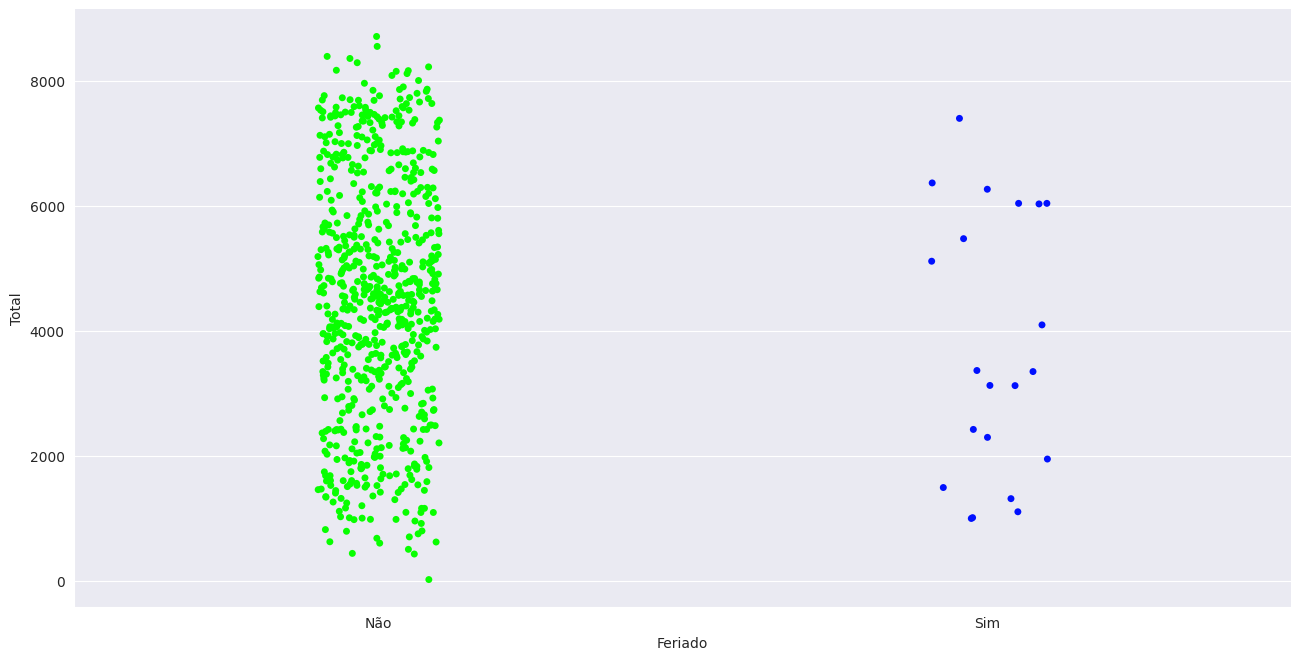

In [42]:
ax = sns.catplot(x="Feriado", y="Total", palette="hsv", data=dados)
ax.figure.set_size_inches(15, 7)

Podemos ver que mesmo sendo feriado em poucos dias, o fato de ser feriado não está relacionado com o total de pessoas.

##Matriz de Correlação
-----------------------------

Matriz de correlação:

In [43]:
dados.corr()

<ipython-input-43-27ee38a39a92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr()


,Temperatura,Sensação_Térmica,Umidade,Velocidade_Vento,Casuais,Registrados,Total
Temperatura,1.000000,0.991407,0.125204,-0.157659,0.542825,0.539869,0.627216
Sensação_Térmica,0.991407,1.000000,0.139541,-0.181526,0.543806,0.543504,0.630491
Umidade,0.125204,0.139541,1.000000,-0.249820,-0.078179,-0.091690,-0.101558
Velocidade_Vento,-0.157659,-0.181526,-0.249820,1.000000,-0.167593,-0.217039,-0.234208
Casuais,0.542825,0.543806,-0.078179,-0.167593,1.000000,0.395282,0.672804
Registrados,0.539869,0.543504,-0.091690,-0.217039,0.395282,1.000000,0.945517
Total,0.627216,0.630491,-0.101558,-0.234208,0.672804,0.945517,1.000000


Plot da Matriz de correlação:

<ipython-input-44-e72b5f0d6ff1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(dados.corr(), annot=True, vmin=-1,vmax=1, cmap="coolwarm")


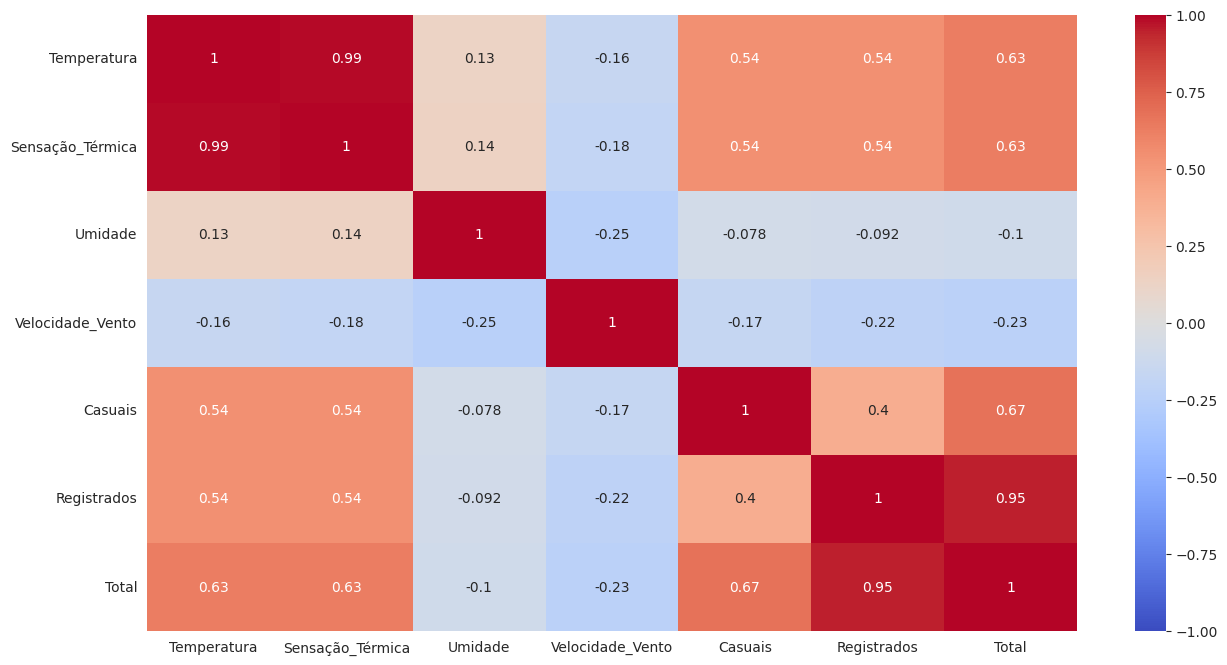

In [44]:
plt.subplots(figsize=(15,8))
ax = sns.heatmap(dados.corr(), annot=True, vmin=-1,vmax=1, cmap="coolwarm")

###Gráfico de espalhamento

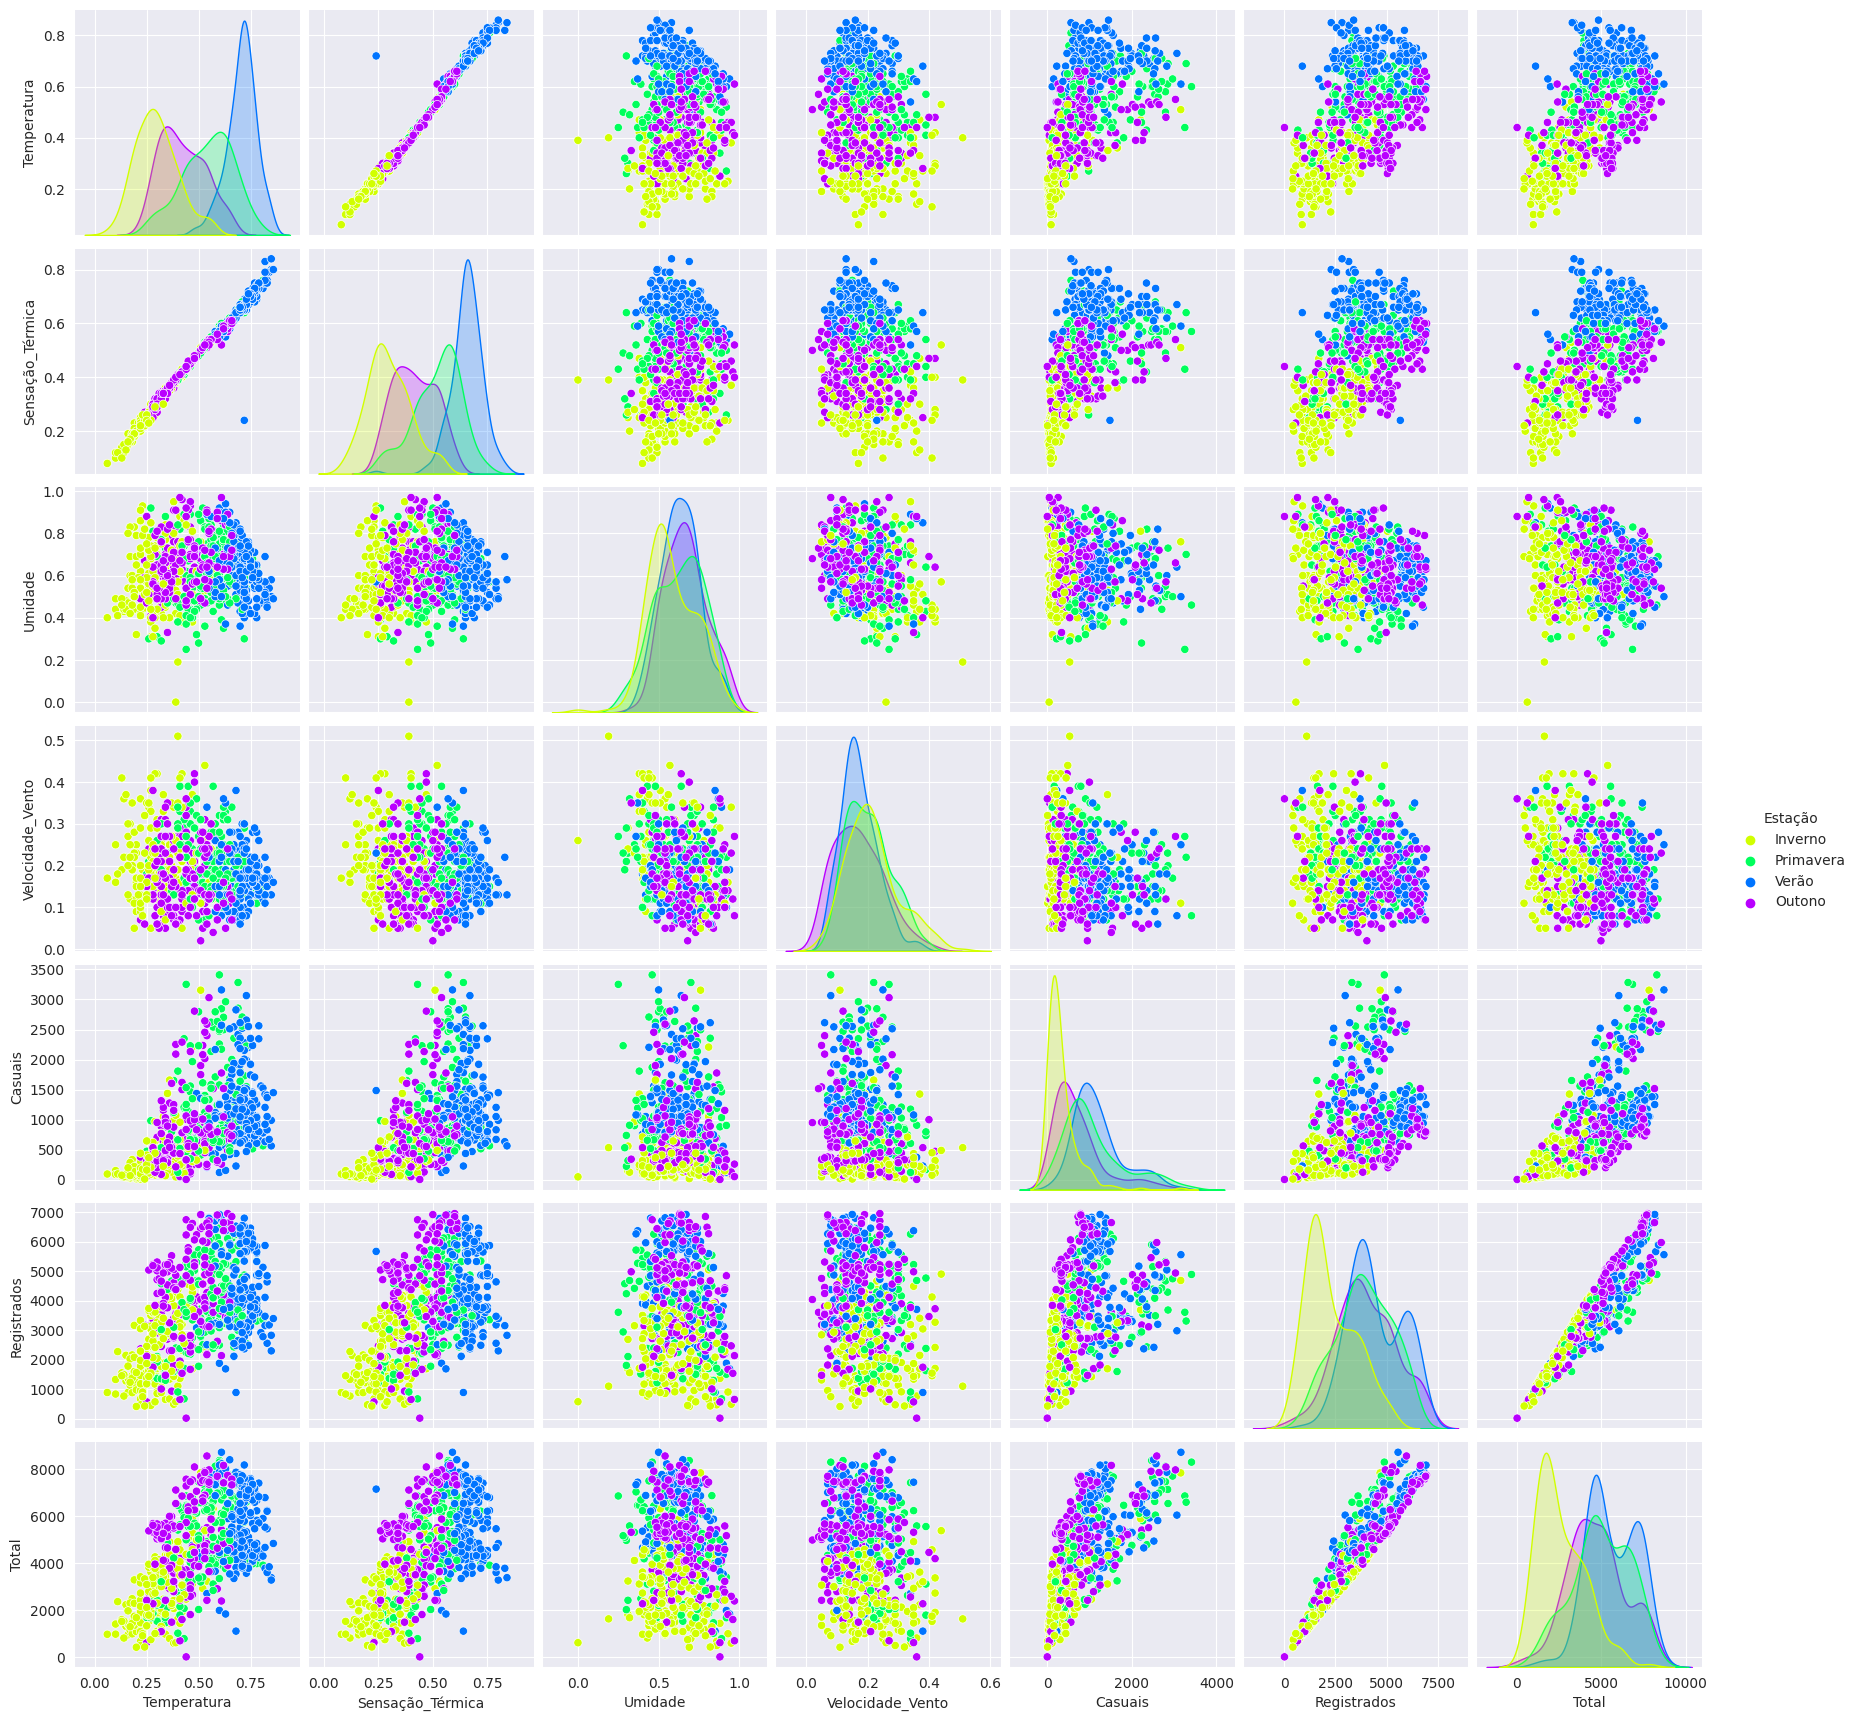

In [45]:
ax = sns.pairplot(dados, hue = "Estação",  palette="hsv")

##Análise Final
-----------------------

De uma forma geral, o Dataset é muito bem organizado, alguns dados tiveram que ser modificados para uma melhor leitura (apresentar um relatório por exemplo).
Porém, existem algumas ressalvas:

A temperatura não está em um valor “normal” do dia-a-dia, o cálculo foi feito utilizando uma fórmula que leva em conta a variação da temperatura durante o dia todo. Não é possível converter o valor para média ou a variação no dia, pois o Dataset não traz o valor mínimo e o máximo da mesma.
O mesmo acontece com outros dados como Sensação Térmica, Umidade e Velocidade do Vento.

Por fim, podemos gerar um grande relatório com vários dados úteis para a Empresa, ou até mesmo fazer um algoritmo de machine learning afim de realizar várias previsões. Modelos como Regressão Linear, Árvore de Decisão e Rede Neural podem ser utilizados